# Linear Regression on Stock Market Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_excel("stock market dataset for linear regression.xlsx")
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
df.isna().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [6]:
df["Date"]=pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1258 non-null   datetime64[ns]
 1   Open         1258 non-null   float64       
 2   High         1258 non-null   float64       
 3   Low          1258 non-null   float64       
 4   Close*       1258 non-null   float64       
 5   Adj Close**  1258 non-null   float64       
 6   Volume       1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [7]:
df["Days_Since_Start"]=(df["Date"]-df["Date"].min()).dt.days
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Days_Since_Start
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,1823
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,1822
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,1821
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,1820
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,1819


In [8]:
x=df["Days_Since_Start"].values.reshape(-1,1)
x

array([[1823],
       [1822],
       [1821],
       ...,
       [   2],
       [   1],
       [   0]])

In [9]:
y=df["Open"].values
y

array([33797.43, 33381.66, 33596.34, ..., 23836.23, 24097.63, 24117.29])

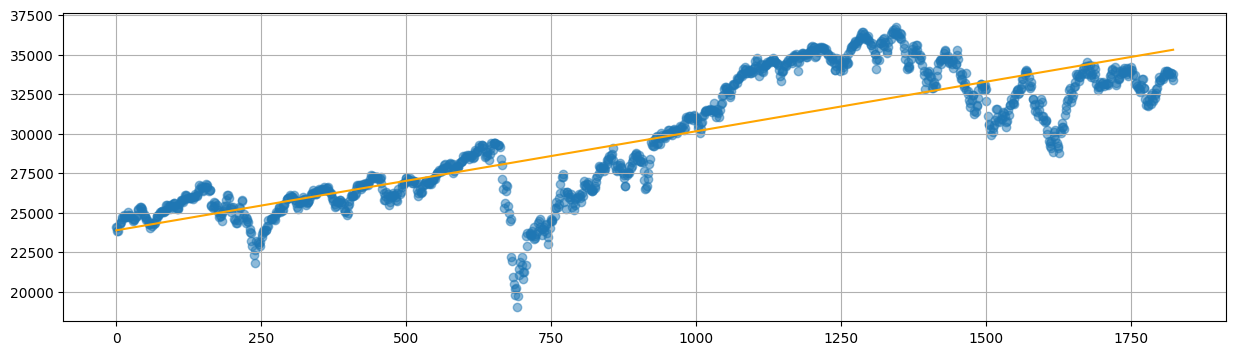

In [12]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
m=model.coef_
c=model.intercept_

plt.figure(figsize=(15,4))
plt.scatter(df["Days_Since_Start"],df["Open"],alpha=0.5)
plt.plot(df["Days_Since_Start"],y_pred,color="orange")
plt.grid()
plt.show()

In [13]:
days = 2000
op = m * days + c
f"Days are {days} and open are {op}"

'Days are 2000 and open are [36409.98748811]'

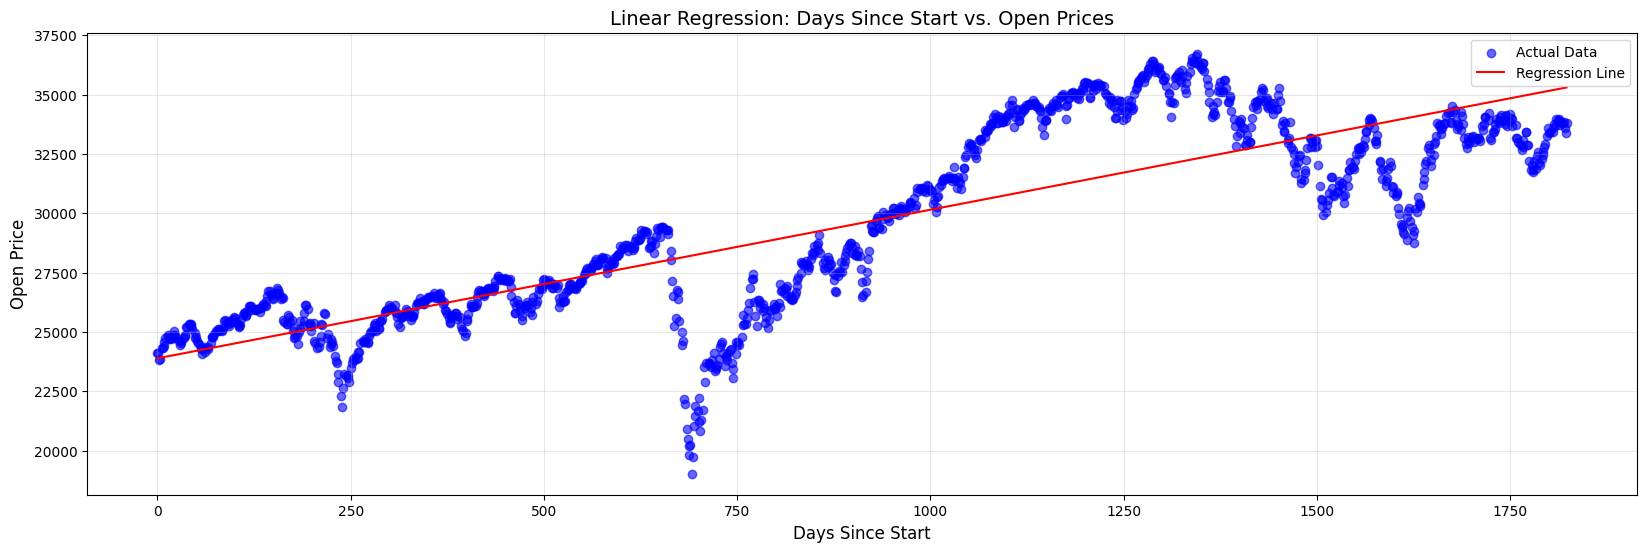

(array([6.25957962]), np.float64(23890.828245253368))

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression
X = df['Days_Since_Start'].values.reshape(-1, 1)
y = df['Open'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions for visualization
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(20, 6))
plt.scatter(df['Days_Since_Start'], df['Open'], color='blue', label='Actual Data', alpha=0.6)
plt.plot(df['Days_Since_Start'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Days Since Start vs. Open Prices', fontsize=14)
plt.xlabel('Days Since Start', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Display regression coefficients
model.coef_, model.intercept_


In [15]:
# Extract the Year-Month as a string
df['Year_Month'] = df['Date'].dt.to_period('M').astype(str)

# Convert Year-Month to a numeric representation (e.g., assigning sequential integers)
df['Year_Month_Num'] = (df['Date'].dt.year * 12 + df['Date'].dt.month)

# Display the updated DataFrame to verify the transformation
df[['Date', 'Year_Month', 'Year_Month_Num', 'Open']].head()


,Date,Year_Month,Year_Month_Num,Open
0,2023-04-28,2023-04,24280,33797.43
1,2023-04-27,2023-04,24280,33381.66
2,2023-04-26,2023-04,24280,33596.34
3,2023-04-25,2023-04,24280,33828.34
4,2023-04-24,2023-04,24280,33805.04


In [16]:
df

,Date,Open,High,Low,Close*,Adj Close**,Volume,Days_Since_Start,Year_Month,Year_Month_Num
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,1823,2023-04,24280
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,1822,2023-04,24280
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,1821,2023-04,24280
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,1820,2023-04,24280
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,1819,2023-04,24280
...,...,...,...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,6,2018-05,24221
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,3,2018-05,24221
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,2,2018-05,24221
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,1,2018-05,24221


In [17]:
groupby=df.groupby("Year_Month_Num")["Open"].mean().reset_index()
groupby

,Year_Month_Num,Open
0,24221,24556.290909
1,24222,24800.519048
2,24223,24926.859048
3,24224,25615.793043
4,24225,26224.554737
5,24226,25683.069565
6,24227,25221.129048
7,24228,23919.946842
8,24229,24087.880952
9,24230,25556.026842


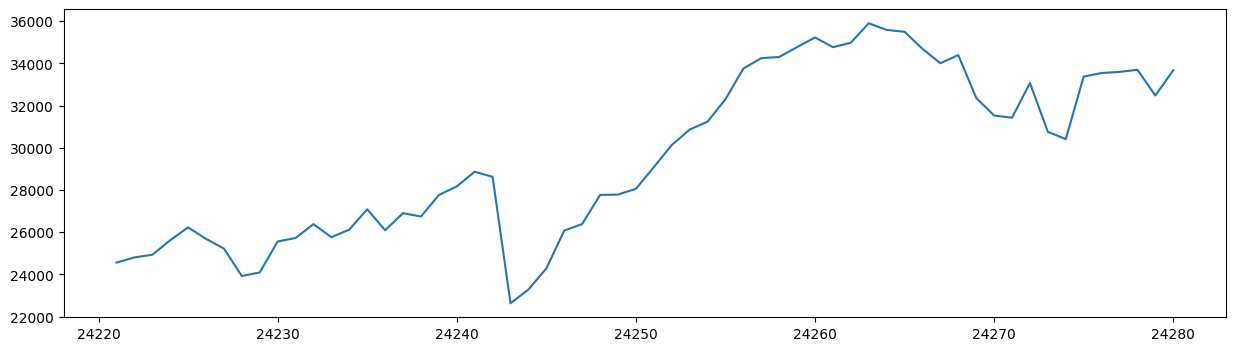

In [32]:
plt.figure(figsize=(15,4))
plt.plot(groupby["Year_Month_Num"],groupby["Open"])
plt.xticks()
plt.show()

In [19]:
x = groupby.drop("Open",axis=1)
y = groupby["Open"]

In [20]:
model = LinearRegression()

In [21]:
model.fit(x,y)

LinearRegression()

In [22]:
m = model.coef_
m

array([190.52281964])

In [23]:
c = model.intercept_
c

np.float64(-4590662.423703254)

In [24]:
y_pred = m * x + c
y_pred

,Year_Month_Num
0,23990.790895
1,24181.313715
2,24371.836535
3,24562.359354
4,24752.882174
5,24943.404993
6,25133.927813
7,25324.450633
8,25514.973452
9,25705.496272


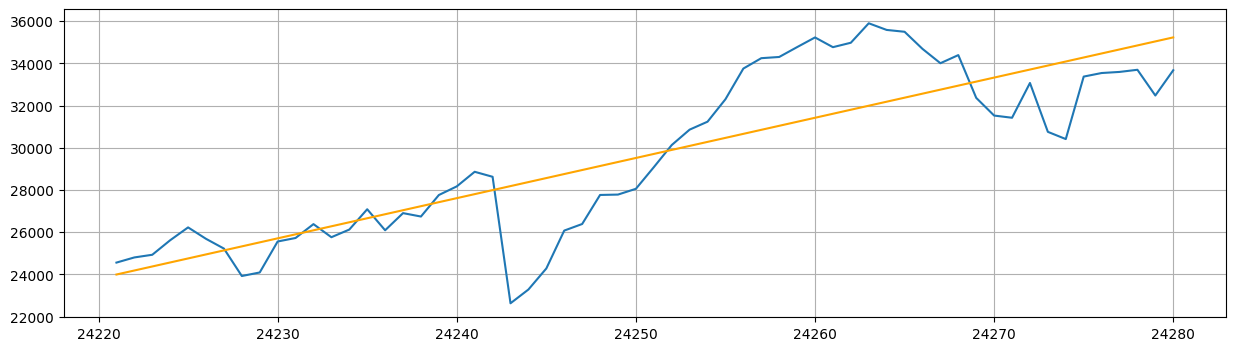

In [33]:
plt.figure(figsize=(15,4))
plt.plot(groupby["Year_Month_Num"],groupby["Open"])
plt.plot(groupby["Year_Month_Num"],y_pred,color="orange")
plt.grid()
plt.show()

In [26]:
MSE = mean_squared_error(y,y_pred)
MSE

np.float64(4696281.7915409785)

In [27]:
RMSE = np.sqrt(MSE)
RMSE

np.float64(2167.090628363516)

In [28]:
r2 = r2_score(y,y_pred)
r2

0.6986267228907184

In [29]:
n=len(y)
k=1
n,k

(60, 1)

In [30]:
adj_r2 = 1-((1-r2) * (n-1)) / (n-k-1)
adj_r2

0.6934306319060757